In [1]:
#测试GPU可用性
import tensorflow as tf
print('GPU可用性:',tf.test.is_gpu_available())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU可用性: True


由于数据集分为trainmap和traindata两个类别，其中traindata为甲基化数据，trainmap为特征标签数据；因此我们需要预处理traindata数据，具体包括数据结构转化、缺失数据处理、甲基化数据与类别数据拼接.

In [2]:
#数据读取
import numpy as np
import pandas as pd
#本次取50000条数据
chunks=50000
traindata = pd.read_csv('/mnt/workspace/Data/train_dataset/traindata.csv', nrows=chunks)    #读取训练集
trainmap = pd.read_csv('/mnt/workspace/Data/train_dataset/trainmap.csv')

In [3]:
#获取基因ID
CG_ID=traindata.iloc[:chunks,0]

In [4]:
#数据预处理函数
#预处理训练集
traindata = traindata.set_index('cpgsite')
traindata = traindata.T
traindata = traindata.reset_index()
traindata = traindata.rename(columns={'index':'sample_id'})
traindata.columns = ['sample_id'] + [i for i in range(chunks)]

In [6]:
traindata.to_pickle('/mnt/workspace/Disease_class/ClassDataPkl/ClassData.pkl')

In [7]:
#加载预处理后的数据
trainmap = pd.read_csv('/mnt/workspace/Data/train_dataset/trainmap.csv')
traindata = pd.read_pickle('/mnt/workspace/Disease_class/ClassDataPkl/ClassData.pkl')

In [8]:
#拼接CG编号
CG_ID_str=['sample_id']+list(CG_ID)
traindata.columns=CG_ID_str
traindata.head(10)

sample_id  cg00050873  cg00212031  cg00213748  cg00214611  cg00455876   
0  train10001         NaN         NaN         NaN         NaN         NaN  \
1  train10002         NaN         NaN         NaN         NaN         NaN   
2  train10003         NaN         NaN         NaN         NaN         NaN   
3  train10004         NaN         NaN         NaN         NaN         NaN   
4  train10005    1.136022   -4.489850         NaN   -3.993781    1.312567   
5  train10006    1.423834   -9.210440    1.035353   -3.837361    1.288795   
6  train10007         NaN         NaN         NaN         NaN         NaN   
7  train10008    1.475799   -3.993781         NaN   -4.051632    1.475799   
8  train10009         NaN         NaN         NaN         NaN         NaN   
9  train10010    1.515914   -4.051632         NaN   -4.585271    1.174443   

   cg01707559  cg02004872  cg02011394  cg02050847  ...  cg19321603   
0         NaN         NaN         NaN         NaN  ...    3.374769  \
1         NaN         NaN         NaN         NaN  ...    2.511081   
2         NaN         NaN         NaN         NaN  ...    2.324893   
3   -1.398461         NaN         NaN         NaN  ...    3.543689   
4   -2.901295   -4.585271    2.804368    2.985388  ...    2.401172   
5   -3.100385   -5.093549    2.767818    1.848299  ...    2.300497   
6         NaN         NaN         NaN         NaN  ...    2.648415   
7   -3.314031   -4.807960    2.785946    2.196336  ...    2.496772   
8         NaN         NaN         NaN         NaN  ...    2.218738   
9   -2.681278   -4.112908    3.406479    2.069693  ...    2.196336   

   cg19326232  cg19331040  cg19342109  cg19343088  cg19343809  cg19348622   
0   -5.492861   -3.201956   -2.414368   -2.698069   -2.942546   -4.402578  \
1   -4.247583   -3.659672   -2.218738   -2.823096   -2.804368   -3.175661   
2   -4.585271   -3.343970   -2.288480   -2.767818   -2.767818   -3.701353   
3   -4.940737   -3.314031   -2.585369   -3.007447   -4.247583   -2.861514   
4   -4.489850   -3.228904   -2.312634   -2.963760   -2.963760   -3.507691   
5   -4.247583   -3.284902   -2.131436   -3.100385   -3.149987   -3.744756   
6   -4.178048   -3.938986   -2.511081   -3.149987   -2.985388   -3.543689   
7   -5.093549   -3.314031   -2.585369   -3.007447   -2.749976   -3.837361   
8   -4.807960   -2.942546   -2.427712   -2.861514   -2.963760   -3.472874   
9   -3.659672   -3.175661   -2.100192   -2.804368   -2.749976   -3.701353   

   cg19349217  cg19349369  cg19350197  
0   -3.201956   -1.185564    2.253116  
1   -3.659672   -1.765757    2.511081  
2   -2.454856   -1.213659    1.765757  
3   -2.942546   -1.856830    2.207487  
4   -4.247583   -1.749816    2.264792  
5   -3.201956   -1.294708    2.185284  
6   -3.406479   -1.703036    2.767818  
7   -3.790034   -0.699002    2.468664  
8   -2.881228   -1.865415    2.570129  
9   -3.007447   -1.749816    2.163468  

[10 rows x 50001 columns]

In [9]:
#统计数据空缺值
traindata_null=traindata.isnull().sum().sum()    #统计前4万个特征缺失值
data_sum=traindata.shape[0]*traindata.shape[1]
traindata_null_rate=traindata_null/data_sum    #计算特征缺失率
print('训练数据缺失数据量为:{0},数据总量为:{1}'.format(traindata_null,data_sum))
print('训练数据缺失率为:{0}%'.format(round(traindata_null_rate*100,4)))

训练数据缺失数据量为:23688484,数据总量为:411658233
训练数据缺失率为:5.7544%


In [10]:
#缺失数据处理
traindata.fillna(0,inplace=True)    #训练集预处理

In [11]:
# 拼接数据集
traindata = traindata.merge(trainmap[['sample_id', 'age', 'gender', 'sample_type', 'disease']],on='sample_id',how='left')

In [12]:
#统计数据中患病数据和患病数据汇总
sample_type_sum=traindata['sample_type'].value_counts()    #统计患病数据总量
print('-----------------患病数据总量----------------')
print(sample_type_sum)
disease_sum=traindata['disease'].value_counts()    #汇总患病数据
print('-----------------患病数据汇总----------------')
print(disease_sum)

-----------------患病数据总量----------------
sample_type
control           6266
disease tissue    1967
Name: count, dtype: int64
-----------------患病数据汇总----------------
disease
control                 6266
Alzheimer's disease      737
schizophrenia            381
Parkinson's disease      266
rheumatoid arthritis     159
stroke                   147
Huntington's disease     135
Graves' disease           58
type 2 diabetes           46
Sjogren's syndrome        38
Name: count, dtype: int64


In [13]:
#数据类型转化
disease_mapping = {
    'control': 0,
    "Alzheimer's disease": 1,
    "Graves' disease": 2,
    "Huntington's disease": 3,
    "Parkinson's disease": 4,
    'rheumatoid arthritis': 5,
    'schizophrenia': 6,
    "Sjogren's syndrome": 7,
    'stroke': 8,
    'type 2 diabetes': 9
}    #构建数据对应关系
sample_type_mapping = {'control': 0, 'disease tissue': 1}
gender_mapping = {'F': 0, 'M': 1}
#训练集转化
traindata['disease_encode'] = traindata['disease'].map(disease_mapping)
traindata['sample_type_encode'] = traindata['sample_type'].map(sample_type_mapping)
traindata['gender_encode'] = traindata['gender'].map(gender_mapping)

In [14]:
traindata.head(10)

sample_id  cg00050873  cg00212031  cg00213748  cg00214611  cg00455876   
0  train10001    0.000000    0.000000    0.000000    0.000000    0.000000  \
1  train10002    0.000000    0.000000    0.000000    0.000000    0.000000   
2  train10003    0.000000    0.000000    0.000000    0.000000    0.000000   
3  train10004    0.000000    0.000000    0.000000    0.000000    0.000000   
4  train10005    1.136022   -4.489850    0.000000   -3.993781    1.312567   
5  train10006    1.423834   -9.210440    1.035353   -3.837361    1.288795   
6  train10007    0.000000    0.000000    0.000000    0.000000    0.000000   
7  train10008    1.475799   -3.993781    0.000000   -4.051632    1.475799   
8  train10009    0.000000    0.000000    0.000000    0.000000    0.000000   
9  train10010    1.515914   -4.051632    0.000000   -4.585271    1.174443   

   cg01707559  cg02004872  cg02011394  cg02050847  ...  cg19349217   
0    0.000000    0.000000    0.000000    0.000000  ...   -3.201956  \
1    0.000000    0.000000    0.000000    0.000000  ...   -3.659672   
2    0.000000    0.000000    0.000000    0.000000  ...   -2.454856   
3   -1.398461    0.000000    0.000000    0.000000  ...   -2.942546   
4   -2.901295   -4.585271    2.804368    2.985388  ...   -4.247583   
5   -3.100385   -5.093549    2.767818    1.848299  ...   -3.201956   
6    0.000000    0.000000    0.000000    0.000000  ...   -3.406479   
7   -3.314031   -4.807960    2.785946    2.196336  ...   -3.790034   
8    0.000000    0.000000    0.000000    0.000000  ...   -2.881228   
9   -2.681278   -4.112908    3.406479    2.069693  ...   -3.007447   

   cg19349369  cg19350197   age  gender     sample_type              disease   
0   -1.185564    2.253116  88.0       F  disease tissue  Alzheimer's disease  \
1   -1.765757    2.511081  92.0       F  disease tissue  Alzheimer's disease   
2   -1.213659    1.765757  93.0       F  disease tissue  Alzheimer's disease   
3   -1.856830    2.207487  96.0       F  disease tissue  Alzheimer's disease   
4   -1.749816    2.264792  91.0       M  disease tissue  Alzheimer's disease   
5   -1.294708    2.185284  80.0       M  disease tissue  Alzheimer's disease   
6   -1.703036    2.767818  79.0       F  disease tissue  Alzheimer's disease   
7   -0.699002    2.468664  77.0       M  disease tissue  Alzheimer's disease   
8   -1.865415    2.570129  85.0       F  disease tissue  Alzheimer's disease   
9   -1.749816    2.163468  80.0       M  disease tissue  Alzheimer's disease   

   disease_encode  sample_type_encode  gender_encode  
0               1                   1            0.0  
1               1                   1            0.0  
2               1                   1            0.0  
3               1                   1            0.0  
4               1                   1            1.0  
5               1                   1            1.0  
6               1                   1            0.0  
7               1                   1            1.0  
8               1                   1            0.0  
9               1                   1            1.0  

[10 rows x 50008 columns]

接下来根据输入数据训练疾病分类预测模型，主要包括XGBoost、CatBoost、LightGM和Votting模型

特征提取和特征选择

In [15]:
#数据集划分
Data_Class=traindata.iloc[:,1:-7]    #输入特征
disease=traindata.loc[:,'disease_encode']    #输入特征

In [16]:
Data_Class

cg00050873  cg00212031  cg00213748  cg00214611  cg00455876  cg01707559   
0       0.000000    0.000000         0.0    0.000000    0.000000    0.000000  \
1       0.000000    0.000000         0.0    0.000000    0.000000    0.000000   
2       0.000000    0.000000         0.0    0.000000    0.000000    0.000000   
3       0.000000    0.000000         0.0    0.000000    0.000000   -1.398461   
4       1.136022   -4.489850         0.0   -3.993781    1.312567   -2.901295   
...          ...         ...         ...         ...         ...         ...   
8228    1.991711   -3.886935         0.0   -3.256540    0.851873   -2.664729   
8229    2.020410   -3.938986         0.0   -3.543689    1.259524   -2.388119   
8230    1.814692   -3.343970         0.0   -3.580953    0.000000   -2.570129   
8231    1.550147   -2.963760         0.0   -3.744756    1.443126   -0.904911   
8232    2.142023   -2.881228         0.0   -3.701353    0.000000   -2.110522   

      cg02004872  cg02011394  cg02050847  cg02233190  ...  cg19321603   
0       0.000000    0.000000    0.000000    0.000000  ...    3.374769  \
1       0.000000    0.000000    0.000000    0.000000  ...    2.511081   
2       0.000000    0.000000    0.000000    0.000000  ...    2.324893   
3       0.000000    0.000000    0.000000    0.000000  ...    3.543689   
4      -4.585271    2.804368    2.985388   -4.402578  ...    2.401172   
...          ...         ...         ...         ...  ...         ...   
8228   -4.051632    2.842141    4.585271   -4.322159  ...    2.142023   
8229   -4.112908    3.472874    3.701353   -3.938986  ...    1.963624   
8230   -4.585271    3.343970    4.585271   -4.178048  ...    1.865415   
8231   -4.585271    3.374769    3.837361   -3.993781  ...    1.900305   
8232   -4.051632    3.406479    4.807960   -4.247583  ...    2.300497   

      cg19326232  cg19331040  cg19342109  cg19343088  cg19343809  cg19348622   
0      -5.492861   -3.201956   -2.414368   -2.698069   -2.942546   -4.402578  \
1      -4.247583   -3.659672   -2.218738   -2.823096   -2.804368   -3.175661   
2      -4.585271   -3.343970   -2.288480   -2.767818   -2.767818   -3.701353   
3      -4.940737   -3.314031   -2.585369   -3.007447   -4.247583   -2.861514   
4      -4.489850   -3.228904   -2.312634   -2.963760   -2.963760   -3.507691   
...          ...         ...         ...         ...         ...         ...   
8228   -4.585271   -4.051632   -2.540233   -2.482634   -3.149987   -3.790034   
8229   -4.247583   -3.374769   -2.276579   -2.401172   -2.632328   -3.580953   
8230   -4.690541   -3.472874   -2.664729   -2.861514   -3.029956   -3.406479   
8231   -4.940737   -3.228904   -2.454856   -3.076403   -3.543689   -3.619579   
8232   -4.489850   -3.886935   -2.540233   -2.901295   -2.921730   -3.343970   

      cg19349217  cg19349369  cg19350197  
0      -3.201956   -1.185564    2.253116  
1      -3.659672   -1.765757    2.511081  
2      -2.454856   -1.213659    1.765757  
3      -2.942546   -1.856830    2.207487  
4      -4.247583   -1.749816    2.264792  
...          ...         ...         ...  
8228   -2.732410   -4.402578    0.929415  
8229   -2.664729   -3.507691    0.708031  
8230   -4.247583   -3.993781    0.627708  
8231   -3.543689   -4.247583    0.818704  
8232   -3.886935   -4.178048    0.880658  

[8233 rows x 50000 columns]

In [17]:
#低方差滤过策略
from sklearn.feature_selection import VarianceThreshold
Variance_Threshold=VarianceThreshold(threshold=0.5)
Variance_Threshold.fit(Data_Class)
print('剩余特征个数:',len(Variance_Threshold.get_support(True)))

剩余特征个数: 30135


In [18]:
from pandas import DataFrame
Data_Class=Variance_Threshold.transform(Data_Class)    #数据集转化
Data_Class=DataFrame(Data_Class)
Data_Class.columns=Variance_Threshold.get_feature_names_out()

In [23]:
#高相关过滤法，基于F分布
from sklearn.feature_selection import SelectKBest,f_classif
KBest=SelectKBest(score_func=f_classif,k=10000)    #获取高相关的前100000个特征
KBest.fit(Data_Class,disease)
from pandas import DataFrame
Score_DF=DataFrame()
Score_DF['feature']=DataFrame(Data_Class).columns    #特征命
Score_DF['Score']=KBest.scores_    #相关系数
Score_DF['P-value']=KBest.pvalues_    #P值
Score_DF=Score_DF.sort_values('Score',ascending=False)

In [ ]:
#查看特征相关系数、P值
Score_DF.head(50)

In [25]:
#数据拼接
Data_Class=KBest.transform(Data_Class)
Data_Class=DataFrame(Data_Class)
Data_Class.columns=KBest.get_feature_names_out()

In [26]:
Data_Class

cg03706273  cg10363397  cg00014152  cg00016522  cg00072839  cg00374088   
0      -4.247583    0.000000    3.076403    0.116107   -4.322159    0.447220  \
1      -4.322159    0.000000    2.985388   -0.241113   -4.178048    0.306312   
2      -3.701353    0.000000    2.585369    0.322708   -2.174329    0.667610   
3      -3.472874    0.000000    2.804368    0.422073   -6.163916    0.363891   
4      -4.585271   -3.314031    1.945225   -1.628272   -4.940737    0.804620   
...          ...         ...         ...         ...         ...         ...   
8228   -4.489850    2.100192    9.210440   -4.489850   -2.963760   -2.785946   
8229   -3.406479    1.718460    5.093549   -4.247583   -2.749976   -2.732410   
8230   -2.732410    3.619579    3.701353   -3.993781   -2.585369   -2.616463   
8231   -3.439160    3.543689    3.938986   -3.374769   -2.401172   -1.564056   
8232   -3.149987    3.406479    4.322159   -4.940737   -2.804368   -2.207487   

      cg00688681  cg00723997  cg00938641  cg01013491  ...  cg19190211   
0       0.557927   -0.064009    1.288795    3.314031  ...    3.007447  \
1      -0.011998   -0.277716    1.324576    2.942546  ...    3.175661   
2       0.261427   -0.204671    1.247949    3.201956  ...    2.241551   
3       0.443019   -0.532105    1.392179    3.472874  ...    3.076403   
4       0.298130   -1.109037    1.230724    3.406479  ...    2.276579   
...          ...         ...         ...         ...  ...         ...   
8228   -1.606561   -3.100385    2.300497    2.414368  ...    2.985388   
8229   -2.039899   -2.511081    2.288480    2.732410  ...    2.664729   
8230   -1.318561   -3.052934    2.585369    2.570129  ...    3.507691   
8231   -1.726235   -3.076403    2.059685    2.804368  ...    2.942546   
8232   -2.030118   -3.228904    2.441207    2.264792  ...    3.052934   

      cg19192280  cg19241689  cg19258508  cg19259829  cg19263700  cg19291355   
0       0.000000   -3.124904   -0.880658    2.511081   -1.543240   -3.886935  \
1       0.000000   -2.715111   -4.051632    3.124904   -1.665178   -3.100385   
2       2.079779   -2.482634   -4.051632    2.664729   -1.330612   -3.472874   
3       2.059685   -3.439160   -6.163916    2.985388   -1.509157   -4.940737   
4       0.000000   -3.472874   -4.322159    2.804368   -1.436670   -3.406479   
...          ...         ...         ...         ...         ...         ...   
8228   -2.375206   -3.580953   -4.690541    1.665178   -3.701353   -3.993781   
8229   -1.865415   -3.580953   -4.690541    1.557086   -4.051632   -3.472874   
8230    0.000000   -4.112908   -4.322159    1.449607   -4.178048   -3.343970   
8231   -2.401172   -3.938986   -5.773449    1.529517   -3.659672   -3.007447   
8232    0.000000   -3.938986   -5.273603    1.606561   -3.659672   -3.175661   

      cg19320816  cg19349369  cg19350197  
0      -3.149987   -1.185564    2.253116  
1      -3.406479   -1.765757    2.511081  
2      -3.837361   -1.213659    1.765757  
3      -3.790034   -1.856830    2.207487  
4      -3.701353   -1.749816    2.264792  
...          ...         ...         ...  
8228   -4.402578   -4.402578    0.929415  
8229   -4.322159   -3.507691    0.708031  
8230   -5.773449   -3.993781    0.627708  
8231   -4.322159   -4.247583    0.818704  
8232   -4.940737   -4.178048    0.880658  

[8233 rows x 10000 columns]

In [31]:
#数据样本正态性检验
from scipy.stats import normaltest
CgNormal_list=[]
for cg in Data_Class.columns:
    cg_data=Data_Class.loc[:,cg]    #获取cg数据
    NormalStats,p_value=normaltest(cg_data)     #正态检验
    if p_value>=0.05:
        print('甲基化位点:{0},正态检验结果:{1},P值:{2}'.format(cg,NormalStats,p_value))
        CgNormal_list.append(cg)

甲基化位点:cg00425885,正态检验结果:4.985875627771477,P值:0.0826667499616028
甲基化位点:cg04158367,正态检验结果:2.9654561771258137,P值:0.22701751893287192
甲基化位点:cg08928753,正态检验结果:1.275617118757193,P值:0.5284492211435821
甲基化位点:cg09154356,正态检验结果:4.815128587611353,P值:0.09003432488003488
甲基化位点:cg15198247,正态检验结果:2.8123940118438835,P值:0.2450735263469884
甲基化位点:cg18236877,正态检验结果:2.1216567622323197,P值:0.3461689317180136
甲基化位点:cg19827875,正态检验结果:0.641432390561573,P值:0.7256291587496142
甲基化位点:cg26907438,正态检验结果:1.0417861081558337,P值:0.5939898459784846
甲基化位点:cg01089914,正态检验结果:2.0895931642679137,P值:0.35176336705426064
甲基化位点:cg25168494,正态检验结果:3.8727230013639273,P值:0.14422776888080377
甲基化位点:cg27091865,正态检验结果:0.5015495971537929,P值:0.7781976030346871
甲基化位点:cg02519751,正态检验结果:0.7884110704597496,P值:0.6742154669674547
甲基化位点:cg07100595,正态检验结果:0.49643893390160276,P值:0.7801886988526888
甲基化位点:cg17482033,正态检验结果:3.1389137204432873,P值:0.20815821066356002
甲基化位点:cg10459087,正态检验结果:1.9132155073302384,P值:0.38419395849580174
甲基化位点:cg10957242,正态检验结

In [ ]:
#查看服从正态分布的甲基化数据
import matplotlib.pyplot as plt
import seaborn as sns
for cg in CgNormal_list:
    hist_plt=plt.figure()
    sns.distplot(Data_Class.loc[:,str(cg)],hist=True,rug=False,kde=True)
    plt.show()

类别标签分布
disease_encode
0    6266
1     737
6     381
4     266
5     159
8     147
3     135
2      58
9      46
7      38
Name: count, dtype: int64


/tmp/ipykernel_652/799417715.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(disease,hist=True,kde=False)


<Axes: xlabel='disease_encode'>

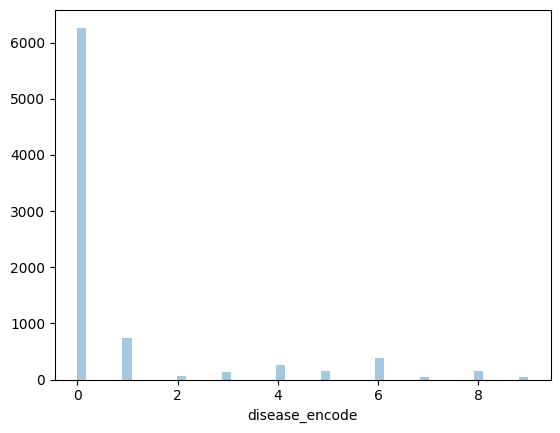

In [41]:
#查看标签数据分布
print('类别标签分布')
print(disease.value_counts())
sns.distplot(disease,hist=True,kde=False)

测试包含是否包含正常样本对模型的影响

包含正常样本

In [33]:
#分配训练和测试集
from sklearn.model_selection import train_test_split
Data_Class['Gender']=traindata.loc[:,'gender_encode']    #接入性别数据
Data_train_class,Data_test_class,Label_train_class,Label_test_class=train_test_split(Data_Class,disease,train_size=0.8,random_state=123)
print('训练集数据规模为:{0},测试集数据规模为:{1}'.format(Data_train_class.shape,Data_test_class.shape))
print('训练集标签规模为:{0},测试集标签规模为:{1}'.format(Label_train_class.shape,Label_test_class.shape)) 

训练集数据规模为:(6586, 10001),测试集数据规模为:(1647, 10001)
训练集标签规模为:(6586,),测试集标签规模为:(1647,)


In [42]:
#查看数据标签分布
print('-------------训练数据集------------------')
print(Label_train_class.value_counts())
print('-------------测试数据集------------------')
print(Label_test_class.value_counts())

-------------训练数据集------------------
disease_encode
0    4992
1     607
6     302
4     220
5     130
8     120
3     107
2      40
9      36
7      32
Name: count, dtype: int64
-------------测试数据集------------------
disease_encode
0    1274
1     130
6      79
4      46
5      29
3      28
8      27
2      18
9      10
7       6
Name: count, dtype: int64


In [43]:
#加载并训练XGBoost模型
import xgboost
Model_XGB_Class=xgboost.XGBClassifier(booster='gbtree',n_estimators=1000,max_depth=2,objective='multi-softmax',gpu_id=0, tree_method='gpu_hist')
Model_XGB_Class.fit(Data_train_class,Label_train_class) 

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [44]:
#模型测量
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,classification_report
def Model_Evaluate(model,X_train,y_train,X_test,y_test):
    train_pred=model.predict(X_train)    #训练误差测定
    precision_train=precision_score(y_train,train_pred,average='micro')
    recall_train=recall_score(y_train,train_pred,average='micro')
    f1_train=f1_score(y_train,train_pred,average='micro')
    accuracy_train=accuracy_score(y_train,train_pred)
    print('模型训练准确率为:{0},召回率为:{1},f1分数为:{2},精度为:{3}'.format(precision_train,recall_train,f1_train,accuracy_train))
    test_pred=model.predict(X_test)    #测试误差测定
    precision_test=precision_score(y_test,test_pred,average='micro')
    recall_test=recall_score(y_test,test_pred,average='micro')
    f1_test=f1_score(y_test,test_pred,average='micro')
    accuracy_test=accuracy_score(y_test,test_pred)
    print('模型测试准确率为:{0},召回率为:{1},f1分数为:{2},精度为:{3}'.format(precision_test,recall_test,f1_test,accuracy_test))
    train_err=1-model.score(X_train,y_train)
    test_err=1-model.score(X_test,y_test)
    print('模型训练误差:{0},测试误差:{1}'.format(train_err,test_err))
    print(classification_report(y_test,test_pred))
Model_Evaluate(Model_XGB_Class, Data_train_class,Label_train_class, Data_test_class,Label_test_class)

模型训练准确率为:0.991041603401154,召回率为:0.991041603401154,f1分数为:0.991041603401154,精度为:0.991041603401154
模型测试准确率为:0.8870673952641166,召回率为:0.8870673952641166,f1分数为:0.8870673952641166,精度为:0.8870673952641166
模型训练误差:0.008958396598846008,测试误差:0.1129326047358834
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1274
           1       0.73      0.72      0.73       130
           2       0.83      0.28      0.42        18
           3       1.00      0.82      0.90        28
           4       0.73      0.52      0.61        46
           5       0.84      0.93      0.89        29
           6       0.74      0.49      0.59        79
           7       1.00      0.67      0.80         6
           8       1.00      0.96      0.98        27
           9       1.00      0.90      0.95        10

    accuracy                           0.89      1647
   macro avg       0.88      0.72      0.78      1647
weighted avg       0.88      0.89      0.88     

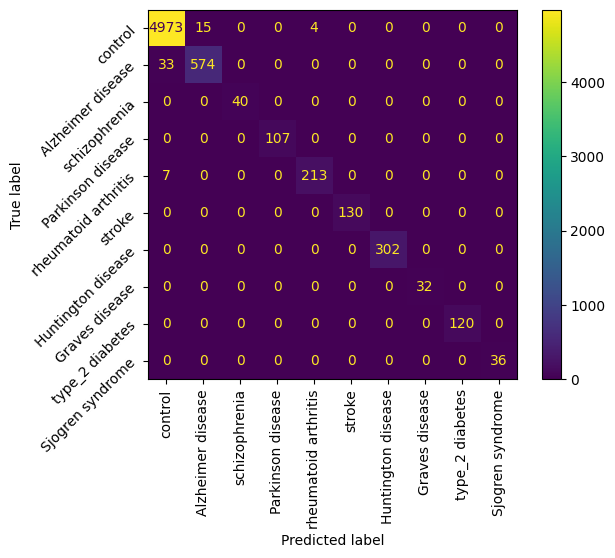

In [75]:
#可视化混淆矩阵
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
Label_class=['control','Alzheimer disease','schizophrenia','Parkinson disease','rheumatoid arthritis',
             'stroke','Huntington disease','Graves disease','type_2 diabetes','Sjogren syndrome']
def Viz_confusion_Matrix(model,X,y):
    y_pred=model.predict(X)
    con_matr=confusion_matrix(y, y_pred)
    con_matr=ConfusionMatrixDisplay(con_matr,display_labels=Label_class)
    con_matr.plot(include_values=True, cmap='viridis', xticks_rotation='horizontal', values_format='d', ax=None)
    con_matr.ax_.set_xticklabels(Label_class, rotation=90)  # 这里可以设置x轴标签的旋转角度 
    con_matr.ax_.set_yticklabels(Label_class, rotation=45)  # 这里可以设置y轴标签的旋转角度
Viz_confusion_Matrix(Model_XGB_Class, Data_train_class,Label_train_class)    #可视化Xgboost模型混淆矩阵(训练)

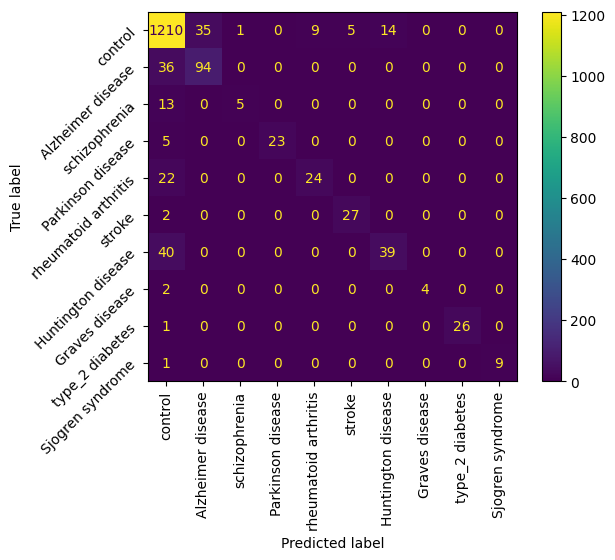

In [76]:
Viz_confusion_Matrix(Model_XGB_Class, Data_test_class,Label_test_class)    #可视化Xgboost模型混淆矩阵(测试)

<Axes: title={'center': 'Feature importance'}, xlabel='gain', ylabel='Features'>

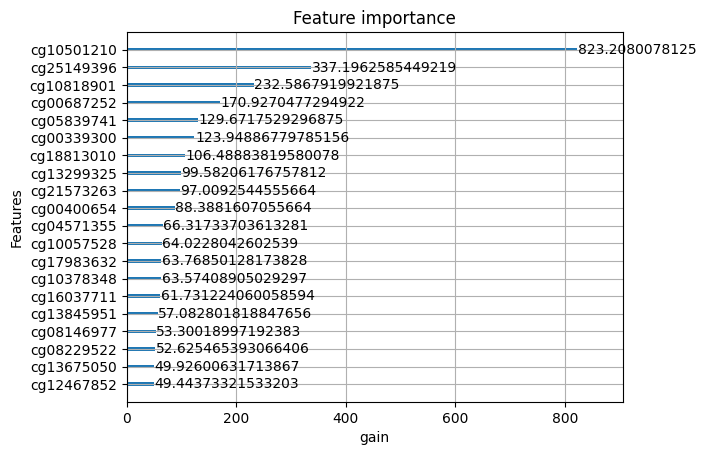

In [47]:
#提取贡献较大的前20个甲基化位点
from xgboost import plot_importance
plot_importance(Model_XGB_Class,max_num_features=20,importance_type='gain',xlabel='gain')    #可视化前20个甲基化位点数据

In [48]:
#保存模型
import joblib
joblib.dump(Model_XGB_Class,'/mnt/workspace/Disease_class/ClassModels/Model_XGB_Class.pkl')

['/mnt/workspace/Disease_class/ClassModels/Model_XGB_Class.pkl']

In [49]:
Model_XGB_Class.save_model('/mnt/workspace/Disease_class/ClassModels/model_file_xgb_class.xgb')

In [ ]:
pip install lightgbm

In [ ]:
from lightgbm import LGBMClassifier
Model_LGB_Class=LGBMClassifier(subsample=0.5,colsample_bytree=0.5,n_jobs=-1)
Model_LGB_Class.fit(Data_train_class,Label_train_class)

In [53]:
Model_Evaluate(Model_LGB_Class, Data_train_class,Label_train_class, Data_test_class,Label_test_class)

模型训练准确率为:0.991041603401154,召回率为:0.991041603401154,f1分数为:0.991041603401154,精度为:0.991041603401154
模型测试准确率为:0.8785670916818458,召回率为:0.8785670916818458,f1分数为:0.8785670916818458,精度为:0.8785670916818458
模型训练误差:0.008958396598846008,测试误差:0.12143290831815423
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1274
           1       0.76      0.69      0.73       130
           2       0.62      0.28      0.38        18
           3       1.00      0.71      0.83        28
           4       0.59      0.35      0.44        46
           5       0.84      0.93      0.89        29
           6       0.74      0.54      0.63        79
           7       1.00      0.50      0.67         6
           8       1.00      0.96      0.98        27
           9       1.00      0.40      0.57        10

    accuracy                           0.88      1647
   macro avg       0.85      0.63      0.70      1647
weighted avg       0.87      0.88      0.87    

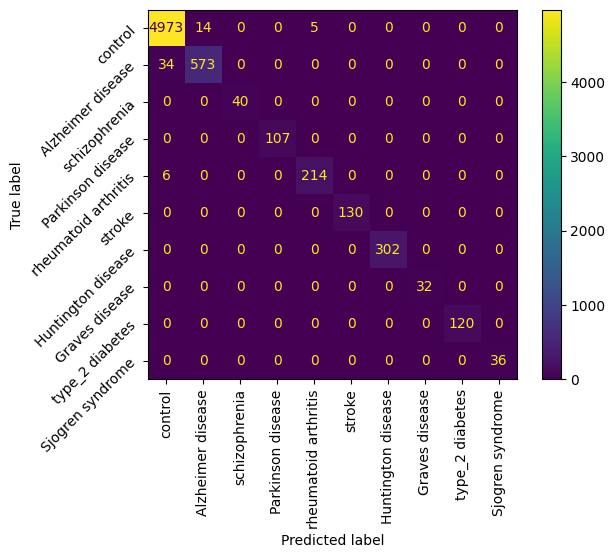

In [77]:
Viz_confusion_Matrix(Model_LGB_Class, Data_train_class,Label_train_class)    #可视化lightGM模型混淆矩阵(训练)

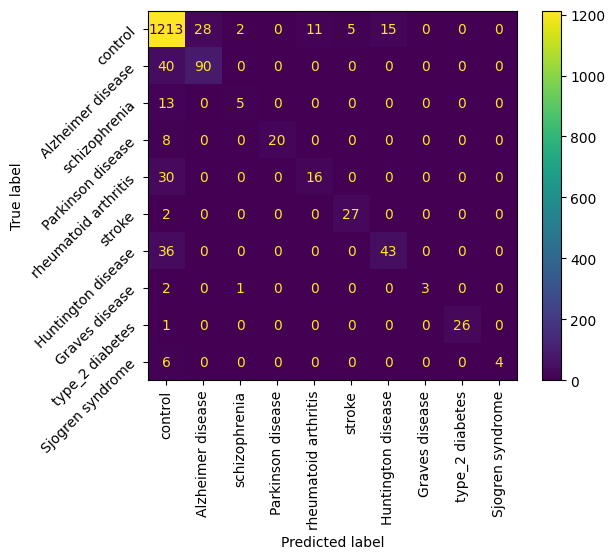

In [78]:
Viz_confusion_Matrix(Model_LGB_Class, Data_test_class,Label_test_class)    #可视化lightGM模型混淆矩阵(测试)

In [ ]:
joblib.dump(Model_LGB_Class,'/mnt/workspace/Disease_class/ClassModels/Model_LGB_Class.pkl')

<Axes: title={'center': 'Feature importance'}, xlabel='gain', ylabel='Features'>

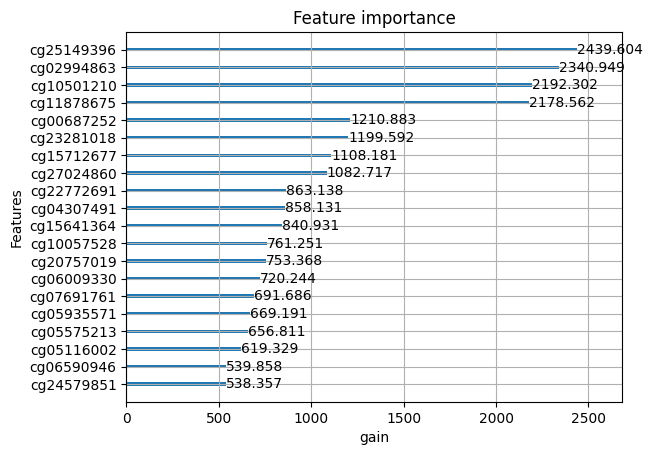

In [58]:
from lightgbm import plot_importance
plot_importance(Model_LGB_Class,max_num_features=20,importance_type='gain',xlabel='gain')    #可视化前20个甲基化位点

In [ ]:
pip install catboost

In [ ]:
#训练catBoost模型
from catboost import CatBoostClassifier
Model_Cat=CatBoostClassifier(learning_rate=0.5, depth=3, bootstrap_type='Bernoulli',
                            random_seed=2023,od_type='Iter', od_wait=100)
Model_Cat.fit(Data_train_class,Label_train_class)

In [79]:
Model_Evaluate(Model_Cat, Data_train_class,Label_train_class, Data_test_class,Label_test_class)

模型训练准确率为:0.9884603704828424,召回率为:0.9884603704828424,f1分数为:0.9884603704828424,精度为:0.9884603704828424
模型测试准确率为:0.8561020036429873,召回率为:0.8561020036429873,f1分数为:0.8561020036429873,精度为:0.8561020036429873
模型训练误差:0.01153962951715759,测试误差:0.14389799635701273
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1274
           1       0.71      0.67      0.69       130
           2       0.71      0.28      0.40        18
           3       0.95      0.68      0.79        28
           4       0.31      0.20      0.24        46
           5       0.86      0.83      0.84        29
           6       0.68      0.54      0.61        79
           7       1.00      0.17      0.29         6
           8       0.96      0.85      0.90        27
           9       0.88      0.70      0.78        10

    accuracy                           0.86      1647
   macro avg       0.79      0.58      0.64      1647
weighted avg       0.85      0.86      0.85 

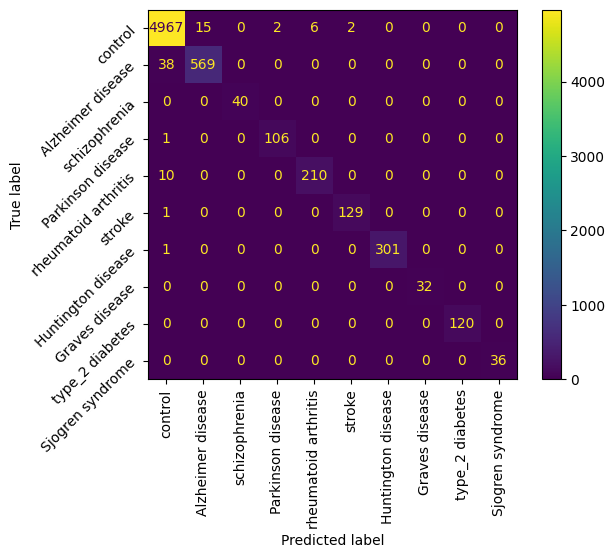

In [80]:
Viz_confusion_Matrix(Model_Cat, Data_train_class,Label_train_class)    #可视化CatBoost模型混淆矩阵(训练)

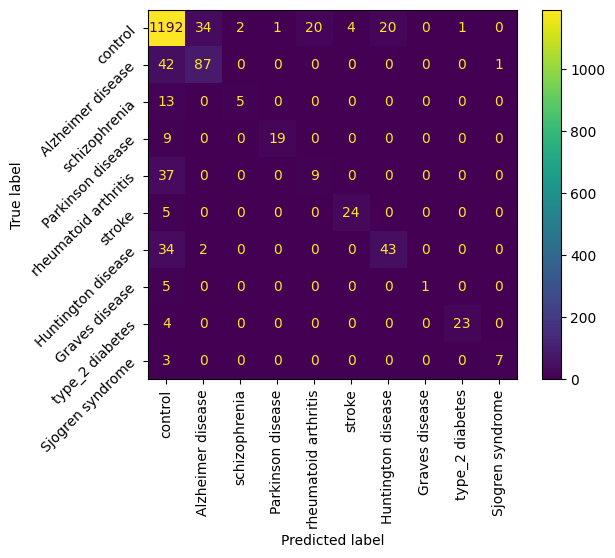

In [81]:
Viz_confusion_Matrix(Model_Cat, Data_test_class,Label_test_class)    #可视化CatBoost模型混淆矩阵(测试)

In [ ]:
joblib.dump(Model_Cat,'/mnt/workspace/Disease_class/ClassModels/Model_Cat_Class.pkl')

In [85]:
#绘制CatBoost模型特征重要性评分
Feature_importance_Cat=DataFrame()
Feature_importance_Cat['fearure names']=Data_train_class.columns    #特征列表
Feature_importance_Cat['fearure importance']=Model_Cat.get_feature_importance()    #特征重要性评分
Feature_importance_Cat=Feature_importance_Cat.sort_values('fearure importance',ascending=False)    #按照降序排序

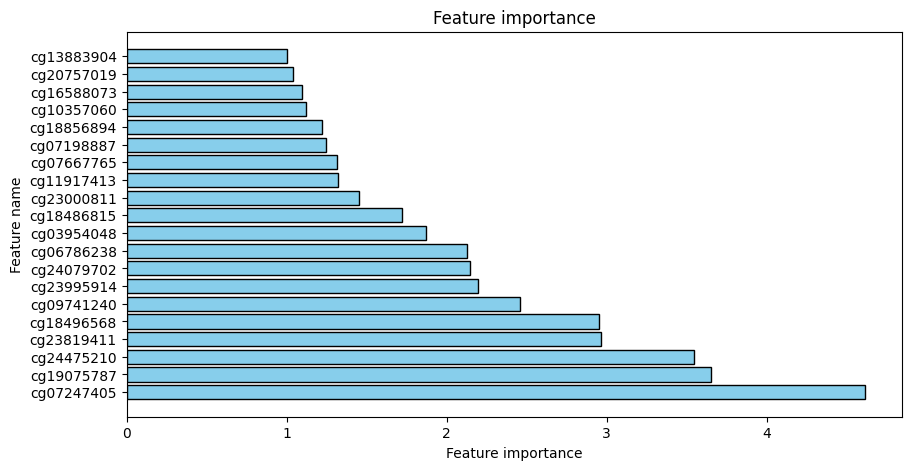

In [86]:
# 绘制CatBoost模型特征重要性柱形图
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.title('Feature importance')
plt.barh(np.arange(1,21), Feature_importance_Cat.iloc[:20,1],color='skyblue', edgecolor='black')
plt.ylabel('Feature name')  
plt.xlabel('Feature importance')
plt.yticks(np.arange(1,21),Feature_importance_Cat.iloc[:20,0])
plt.show()

提取XGBoost模型前20个特征构建SHAP

In [87]:
from pandas import DataFrame
Feature_importance=DataFrame()
Feature_importance['fearure names']=Data_train_class.columns    #特征列表
Feature_importance['fearure importance']=Model_XGB_Class.feature_importances_    #特征重要性评分
Feature_importance=Feature_importance.sort_values('fearure importance',ascending=False)    #按照降序排序

In [88]:
Feature_list=list(Feature_importance.iloc[:20,0])
Feature_Data=traindata.loc[:,Feature_list]
Feature_traindata,Feature_testdata,Feature_trainlabel,Feature_testlabel=train_test_split(Feature_Data,disease,train_size=0.8,random_state=123)
print('训练集数据规模为:{0},测试集数据规模为:{1}'.format(Feature_traindata.shape,Feature_testdata.shape))
print('训练集标签规模为:{0},测试集标签规模为:{1}'.format(Feature_trainlabel.shape,Feature_testlabel.shape)) 

训练集数据规模为:(6586, 20),测试集数据规模为:(1647, 20)
训练集标签规模为:(6586,),测试集标签规模为:(1647,)


In [98]:
#训练XGBoost模型
Feature_XGB=xgboost.XGBClassifier(booster='gbtree',n_estimators=800,max_depth=2,objective='multi-softmax',gpu_id=0, tree_method='gpu_hist')
Feature_XGB.fit(Feature_traindata,Feature_trainlabel)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=800, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [99]:
Model_Evaluate(Feature_XGB,Feature_traindata,Feature_trainlabel,Feature_testdata,Feature_testlabel)

模型训练准确率为:0.9861828120255086,召回率为:0.9861828120255086,f1分数为:0.9861828120255086,精度为:0.9861828120255086
模型测试准确率为:0.8221007893139041,召回率为:0.8221007893139041,f1分数为:0.8221007893139041,精度为:0.8221007893139041
模型训练误差:0.013817187974491385,测试误差:0.17789921068609593
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1274
           1       0.71      0.68      0.70       130
           2       1.00      0.17      0.29        18
           3       0.50      0.36      0.42        28
           4       0.29      0.22      0.25        46
           5       0.67      0.48      0.56        29
           6       0.57      0.38      0.45        79
           7       1.00      0.17      0.29         6
           8       0.88      0.52      0.65        27
           9       0.83      0.50      0.62        10

    accuracy                           0.82      1647
   macro avg       0.73      0.44      0.51      1647
weighted avg       0.81      0.82      0.81

In [ ]:
pip install shap

In [102]:
import shap
Explainer=shap.TreeExplainer(Feature_XGB)    #创建解释器
shap_values=Explainer.shap_values(Feature_traindata)    #计算训练shap值

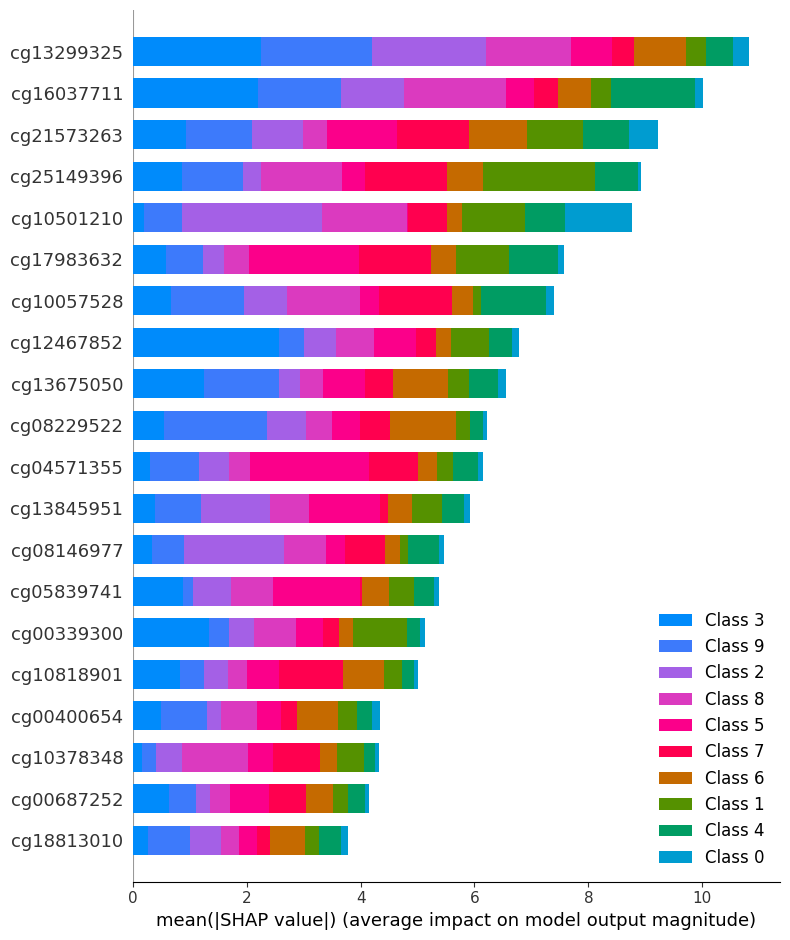

In [103]:
shap.summary_plot(shap_values,Feature_traindata)    #全局特征SHAP分布(训练)

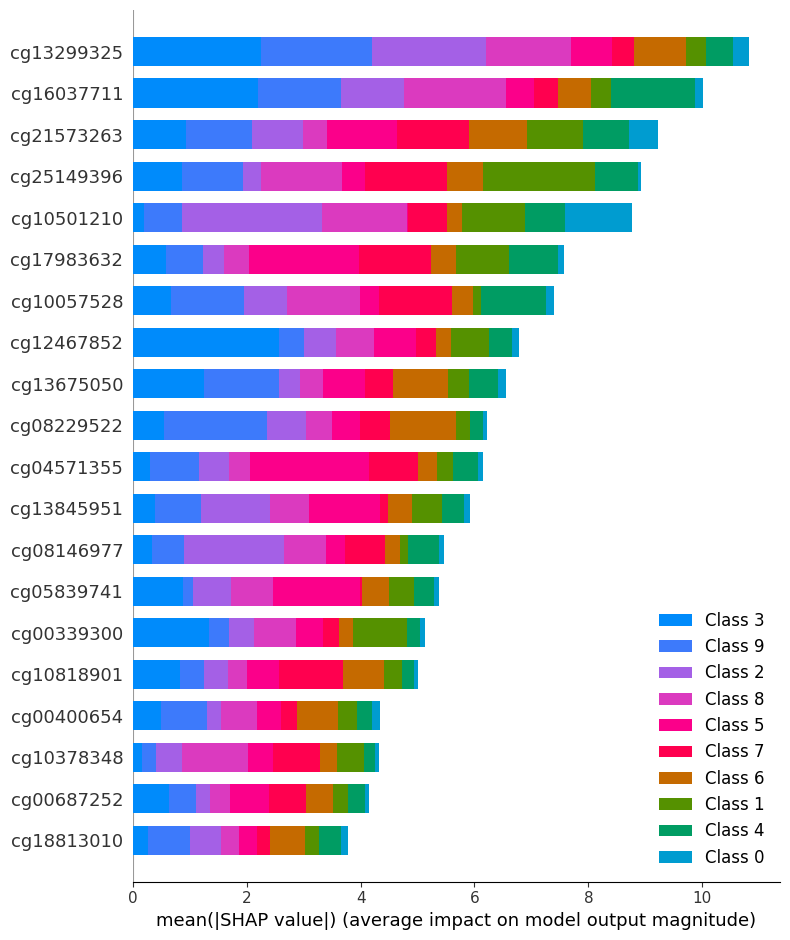

In [104]:
shap.summary_plot(shap_values,Feature_traindata,plot_type='bar')    #特征重要性堆叠图(训练)

In [105]:
Explainer_test=shap.TreeExplainer(Feature_XGB)    #创建解释器
shap_values_test=Explainer_test.shap_values(Feature_testdata)    #计算测试shap值

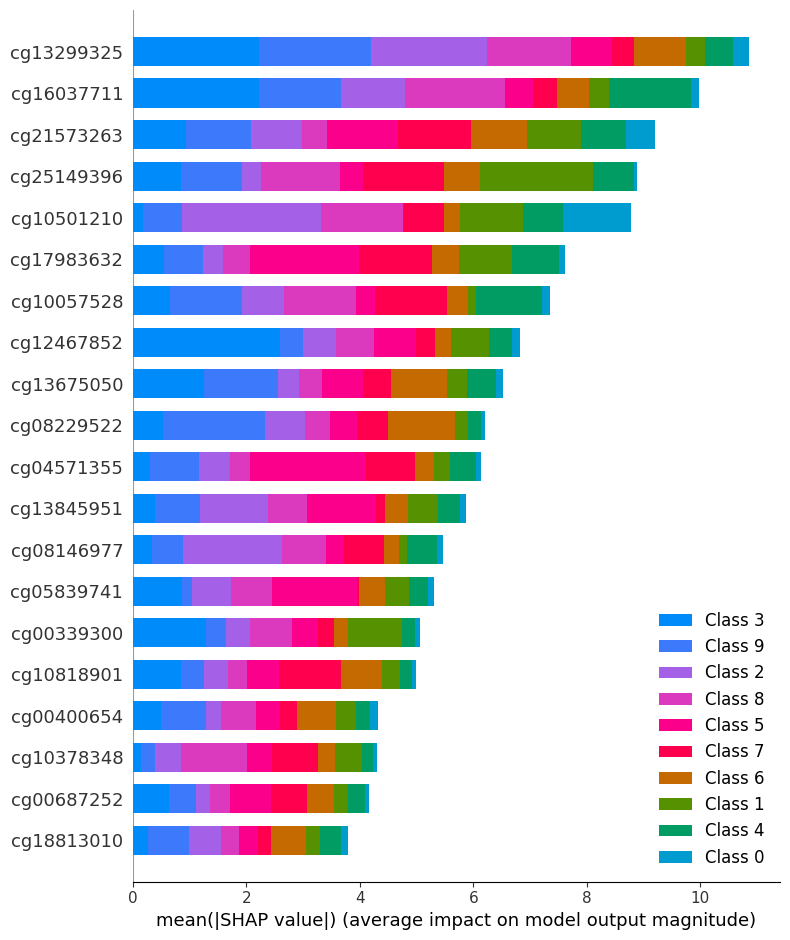

In [106]:
shap.summary_plot(shap_values_test,Feature_testdata)    #全局特征SHAP分布(测试)

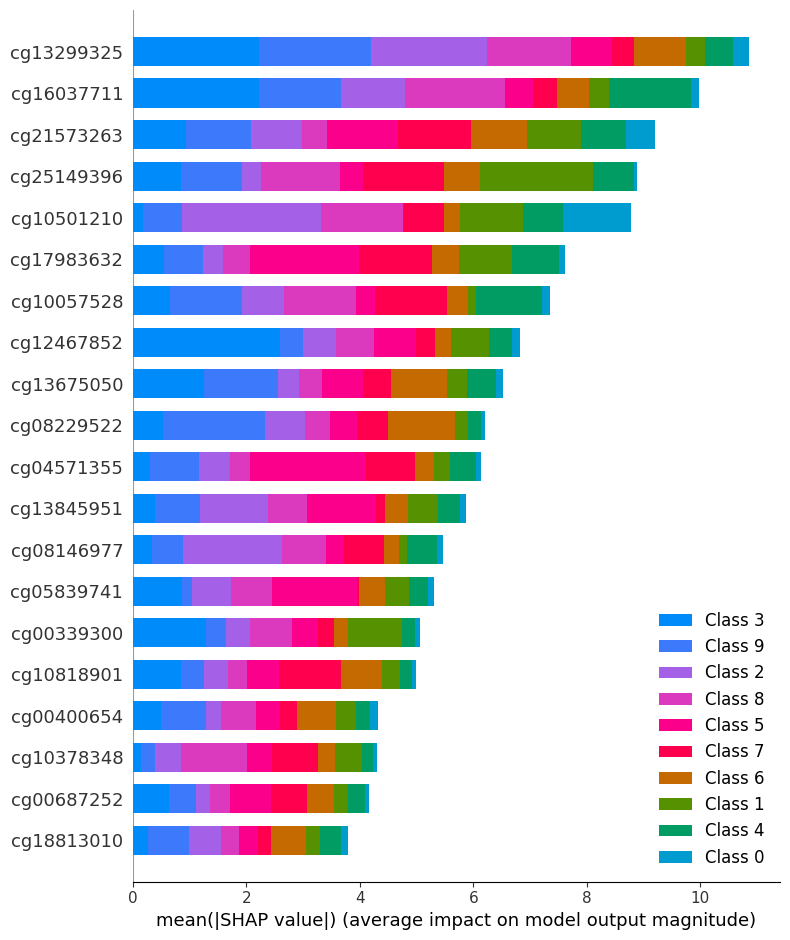

In [107]:
shap.summary_plot(shap_values_test,Feature_testdata,plot_type='bar')    #特征重要性堆叠图(测试)

In [109]:
traindata.head(10)

sample_id  cg00050873  cg00212031  cg00213748  cg00214611  cg00455876   
0  train10001    0.000000    0.000000    0.000000    0.000000    0.000000  \
1  train10002    0.000000    0.000000    0.000000    0.000000    0.000000   
2  train10003    0.000000    0.000000    0.000000    0.000000    0.000000   
3  train10004    0.000000    0.000000    0.000000    0.000000    0.000000   
4  train10005    1.136022   -4.489850    0.000000   -3.993781    1.312567   
5  train10006    1.423834   -9.210440    1.035353   -3.837361    1.288795   
6  train10007    0.000000    0.000000    0.000000    0.000000    0.000000   
7  train10008    1.475799   -3.993781    0.000000   -4.051632    1.475799   
8  train10009    0.000000    0.000000    0.000000    0.000000    0.000000   
9  train10010    1.515914   -4.051632    0.000000   -4.585271    1.174443   

   cg01707559  cg02004872  cg02011394  cg02050847  ...  cg19349217   
0    0.000000    0.000000    0.000000    0.000000  ...   -3.201956  \
1    0.000000    0.000000    0.000000    0.000000  ...   -3.659672   
2    0.000000    0.000000    0.000000    0.000000  ...   -2.454856   
3   -1.398461    0.000000    0.000000    0.000000  ...   -2.942546   
4   -2.901295   -4.585271    2.804368    2.985388  ...   -4.247583   
5   -3.100385   -5.093549    2.767818    1.848299  ...   -3.201956   
6    0.000000    0.000000    0.000000    0.000000  ...   -3.406479   
7   -3.314031   -4.807960    2.785946    2.196336  ...   -3.790034   
8    0.000000    0.000000    0.000000    0.000000  ...   -2.881228   
9   -2.681278   -4.112908    3.406479    2.069693  ...   -3.007447   

   cg19349369  cg19350197   age  gender     sample_type              disease   
0   -1.185564    2.253116  88.0       F  disease tissue  Alzheimer's disease  \
1   -1.765757    2.511081  92.0       F  disease tissue  Alzheimer's disease   
2   -1.213659    1.765757  93.0       F  disease tissue  Alzheimer's disease   
3   -1.856830    2.207487  96.0       F  disease tissue  Alzheimer's disease   
4   -1.749816    2.264792  91.0       M  disease tissue  Alzheimer's disease   
5   -1.294708    2.185284  80.0       M  disease tissue  Alzheimer's disease   
6   -1.703036    2.767818  79.0       F  disease tissue  Alzheimer's disease   
7   -0.699002    2.468664  77.0       M  disease tissue  Alzheimer's disease   
8   -1.865415    2.570129  85.0       F  disease tissue  Alzheimer's disease   
9   -1.749816    2.163468  80.0       M  disease tissue  Alzheimer's disease   

   disease_encode  sample_type_encode  gender_encode  
0               1                   1            0.0  
1               1                   1            0.0  
2               1                   1            0.0  
3               1                   1            0.0  
4               1                   1            1.0  
5               1                   1            1.0  
6               1                   1            0.0  
7               1                   1            1.0  
8               1                   1            0.0  
9               1                   1            1.0  

[10 rows x 50008 columns]

In [111]:
#构建数据子集
Featute_Data=Feature_list+['gender','sample_type','disease','disease_encode','sample_type_encode','gender_encode']
ClassData=traindata.loc[:,Featute_Data]
ClassData.head(10)

cg10501210  cg25149396  cg10818901  cg00687252  cg05839741  cg00339300   
0   -3.100385   -2.152700    4.178048   -1.119787    0.984269   -0.654254  \
1   -2.468664   -2.030118    4.585271   -1.650305    0.689999   -0.959169   
2   -2.985388   -1.831393    4.690541   -1.672671    0.804620   -0.592642   
3   -3.790034   -2.030118    3.837361   -1.848299    1.045719   -0.654254   
4   -3.314031   -2.110522    4.940737   -0.949208    0.814001   -0.597006   
5   -2.804368   -2.089945    4.247583   -1.865415    0.929415   -0.532105   
6   -3.175661   -2.030118    4.807960   -0.900040    0.944243   -0.519260   
7   -2.616463   -1.972920    4.807960   -0.974195    1.103684   -0.397057   
8   -2.616463   -2.253116    9.210440   -1.621000    0.929415   -0.721628   
9   -3.124904   -2.324893    5.093549   -1.509157    0.989323   -0.549300   

   cg18813010  cg13299325  cg21573263  cg00400654  ...  cg08146977   
0    1.848299    2.069693    0.758205    2.079779  ...   -3.284902  \
1    1.443126    1.564056    0.640954    1.635580  ...   -4.322159   
2    1.642924    1.657722    0.929415    2.039899  ...   -3.175661   
3    2.664729    2.207487    0.772045    2.324893  ...   -4.322159   
4    1.456115    1.839820    0.544994    2.049755  ...   -3.659672   
5    1.781880    1.606561    0.804620    1.856830  ...   -3.659672   
6    1.918093    1.909169    0.823416    1.927076  ...   -3.314031   
7    2.089945    2.120936    0.592642    2.324893  ...   -3.507691   
8    2.079779    2.218738    0.749016    2.276579  ...   -3.314031   
9    1.765757    1.621000    0.623305    2.079779  ...   -3.374769   

   cg08229522  cg13675050  cg12467852  gender     sample_type   
0    0.851873    0.575243    1.642924       F  disease tissue  \
1    0.954183    0.068013    1.536363       F  disease tissue   
2    0.762810    0.285874    1.628272       F  disease tissue   
3    1.642924    0.318605    1.578093       F  disease tissue   
4    0.856647    1.509157    1.578093       M  disease tissue   
5    0.939290    1.449607    1.839820       M  disease tissue   
6    1.093021    0.104073    1.502429       F  disease tissue   
7    1.109037    1.814692    1.515914       M  disease tissue   
8    1.045719   -0.052001    1.680203       F  disease tissue   
9    0.814001    1.141464    1.665178       M  disease tissue   

               disease  disease_encode  sample_type_encode  gender_encode  
0  Alzheimer's disease               1                   1            0.0  
1  Alzheimer's disease               1                   1            0.0  
2  Alzheimer's disease               1                   1            0.0  
3  Alzheimer's disease               1                   1            0.0  
4  Alzheimer's disease               1                   1            1.0  
5  Alzheimer's disease               1                   1            1.0  
6  Alzheimer's disease               1                   1            0.0  
7  Alzheimer's disease               1                   1            1.0  
8  Alzheimer's disease               1                   1            0.0  
9  Alzheimer's disease               1                   1            1.0  

[10 rows x 26 columns]

In [ ]:
pip install openpyxl

In [118]:
ClassData.to_excel('/mnt/workspace/Disease_class/Feature_Data_ClassDisease/ClassDisease_FeatureData.xlsx','UTF-8')